In [8]:
import os 
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import librosa
import scipy

In [15]:
filename = '/home/barti/Documents/voicePathology/voiceDataset/FemaleHealthy/117-a_n.wav'

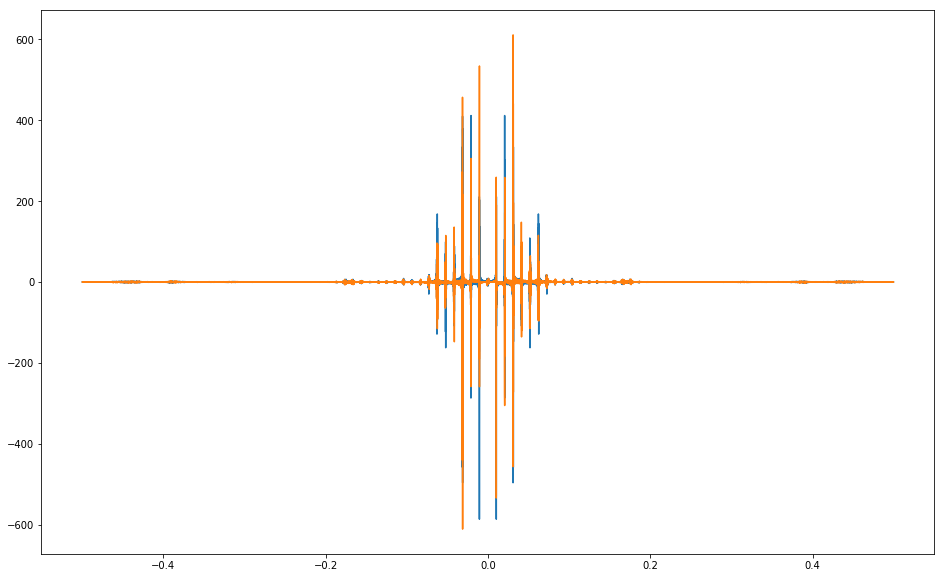

In [16]:
y, sr = librosa.load(filename)
N = len(y)
t = np.arange(0,N,1)/sr
plt.figure(figsize=(16,10))
#plt.subplot(2,2,1)
#plt.plot(t,y)

#L = len(y)/2
fft = np.fft.fft(y)
#fft = np.abs(fft)#/L
#fft = fft[:round(L/2+1)]
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, fft.real, freq, fft.imag)
#plt.plot(fft)
#x = fft.argmax()
#log = np.log10(fft)
#cep = np.fft.ifft(log)
#posmax = cep.argmax() + 1
#f0 = len(cep)*r/(N*x)
#plt.plot(fft)
#plt.show
#f0 = max(np.fft.ifft(np.log10([np.abs()])))
#np.real(f0)

In [4]:
N/sr

1.045668934240363

In [8]:
hop_length = round(N/30)
hop_length
nMFCC = 10

In [10]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=nMFCC)
MFCC = []
for i in range(nMFCC):
    MFCC.append(np.mean(mfcc[i]))

In [11]:
rms = librosa.feature.rmse(y)
np.mean(rms)

0.15244697

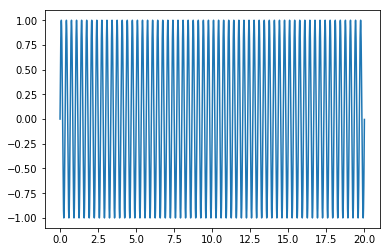

In [9]:
Fs = 5000
f = 3
N = 100000
t = np.arange(N)/Fs
sin = np.sin(2*np.pi*f*t)
plt.plot(t,sin)

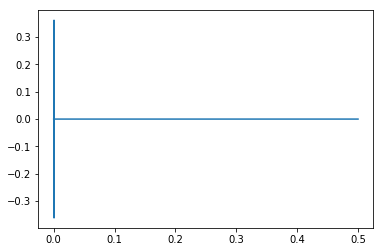

In [35]:
fft = np.fft.fft(sin)
freq = np.fft.fftfreq(N)
#plt.plot(freq[round(N/2):N], fft.real[round(N/2):N])
plt.plot(freq[0:round(N/2)], fft.real[0:round(N/2)])

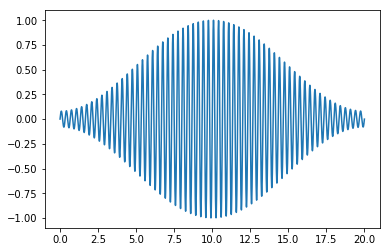

In [34]:
sin = sin*scipy.signal.windows.hamming(N)
plt.plot(t,sin)

In [3]:
from __future__ import division
from numpy.fft import rfft
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
from scipy.signal import blackmanharris, fftconvolve
from time import time
import sys

from parabolic import parabolic

ImportError: cannot import name 'parabolic' from 'parabolic' (/home/barti/miniconda3/lib/python3.7/site-packages/parabolic/__init__.py)

In [12]:
def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    # Calculate autocorrelation (same thing as convolution, but with
    # one input reversed in time), and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]

    # Find the first low point
    d = diff(corr)
    start = find(d > 0)[0]

    # Find the next peak after the low point (other than 0 lag).  This bit is
    # not reliable for long signals, due to the desired peak occurring between
    # samples, and other peaks appearing higher.
    # Should use a weighting function to de-emphasize the peaks at longer lags.
    peak = argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)

    return fs / px

In [11]:
def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
   
    f is a vector and x is an index for that vector.
   
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
   
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
   
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
   
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
   
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)

In [22]:
freq_from_autocorr(y,Fs)

/home/barti/miniconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
/home/barti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  if sys.path[0] == '':


229.10642639179594

In [21]:
Fs, y = wavfile.read(filename)